# PCA dimension reduction

In [3]:
#######################################################
# Program to load the preprocessed data from csv files 
# Neural networks https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/
# https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/
# https://towardsdatascience.com/neural-network-on-iris-data-4e99601a42c8
#######################################################
import pandas as pd
import os

#Read all the LGG files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/LGG/LGG_betaValuesOnly.csv"
dfFrameList = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList.append(chunkTemp)
dataFrame = pd.concat(dfFrameList)        


#Read all the LUSC files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/LUSC/LUSC_betaValuesOnly.csv"
dfFrameList2 = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList2.append(chunkTemp)
dataFrame = dataFrame.append(pd.concat(dfFrameList2), ignore_index= True)   


#Read all the SKCM files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/SKCM/SKCM_betaValuesOnly.csv"
dfFrameList2 = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList2.append(chunkTemp)
dataFrame = dataFrame.append(pd.concat(dfFrameList2), ignore_index= True)   


#Read all the LAML files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/LAML/LAML_betaValuesOnly.csv"
dfFrameList2 = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList2.append(chunkTemp)
dataFrame = dataFrame.append(pd.concat(dfFrameList2), ignore_index= True)   


#Read all the SARC files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/SARC/SARC_betaValuesOnly.csv"
dfFrameList2 = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList2.append(chunkTemp)
dataFrame = dataFrame.append(pd.concat(dfFrameList2), ignore_index= True)   


#Read all the STAD files
#read from csv file in chunks as the file is too big 
filename = "../../output-data/STAD/STAD_betaValuesOnly.csv"
dfFrameList2 = []
for chunkTemp in pd.read_csv(filename, chunksize=20):
    dfFrameList2.append(chunkTemp)
dataFrame = dataFrame.append(pd.concat(dfFrameList2), ignore_index= True)   

In [4]:
#########################
# Check the shape
#########################
dataFrame.shape

(1206, 485578)

In [5]:
#########################
# Dimensionality reduction using PCA
#########################
from sklearn.preprocessing import StandardScaler
#Get all the features i.e. all the columns names
cols = dataFrame.columns
#Take all columns names of features i.e. cg00001 etc. except last column name which has label
features = cols[:-1]
# Separating out the values of the features
x = dataFrame.loc[:, features].values
# Separating out the values of the label
y = dataFrame.loc[:,['CancerType']].values

# PCA projection to n components
from sklearn.decomposition import PCA
pca = PCA(n_components=1200) 
#Fit int x and tranform
principalComponents = pca.fit_transform(x)
#Create a new dataframe consisting of the principal components and target i.e. CancerType
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, dataFrame[['CancerType']]], axis = 1)

# Copy the reduced dimensions to a file
finalDf.to_csv("../../output-data/PCA-ALL/PCA-ALL.csv", index = False)

#Print the new components
finalDf.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,CancerType
0,-55.343285,-126.190156,-179.740709,176.617508,105.096771,29.470689,-49.969141,107.428589,83.472864,-65.010527,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
1,-76.564778,-45.758051,-152.585784,120.916344,40.464931,-29.667521,-13.329516,28.324559,82.610741,-46.028870,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
2,-549.502366,-273.469092,-118.915857,118.495907,0.477319,70.932045,77.167022,-5.171697,-62.889904,-39.829417,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
3,-502.357654,-266.772564,-27.700195,93.084931,91.809505,41.085247,41.356804,-23.764993,-7.872551,-1.030746,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
4,-501.416866,-256.686756,-121.397588,74.965747,83.945138,40.309418,32.916611,-44.554687,-6.541575,-52.891518,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
5,-542.118981,-216.085578,-154.588438,100.631594,18.214736,-23.380787,140.103672,-58.381645,15.786340,2.199567,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
6,70.668553,-55.012790,-196.714484,141.910200,19.267040,-48.832810,-9.866192,35.978007,130.560999,-32.349642,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
7,-714.672213,-313.091486,-57.246248,68.318735,90.897546,70.038473,37.320502,-43.969219,-50.290974,-13.035979,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
8,-684.092996,-245.672665,-77.421551,37.953425,72.493762,-7.681309,21.934606,-42.482929,1.440120,-19.775625,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG
9,-581.427671,-229.024076,-102.420707,65.293164,96.776663,12.888462,21.762938,-39.500445,-15.623715,-18.121467,...,7.575449e-16,3.903185e-16,1.130541e-15,3.310056e-16,5.701954e-17,8.893892e-15,4.492858e-16,9.309029e-17,7.739631e-15,LGG


Text(0, 0.5, 'cumulative explained variance')

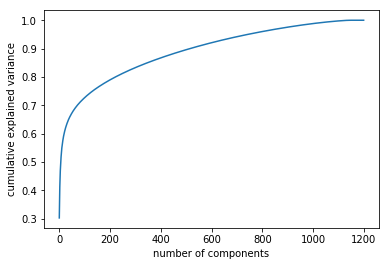

In [6]:
#################################################################################################
#Make sure your principal components capture the variance in the data properly
#Check for variance to see how many components get atleast 90% variance by plotting it
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
#################################################################################################
#Use matplotlib for 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')